In [1]:
pip install numpy

     |████████████████████████████████| 20.2 MB 3.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

     |████████████████████████████████| 12.4 MB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 88 kB 10.3 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 8.2 MB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [54]:
#
min_rho = 0.0
max_rho = 20.0
drho=0.01
N= int((max_rho - min_rho)/drho) #cantidad de puntos o datos que se tomaran
print(N)

2000


In [55]:
def ddR(l,eps,rho,R,dR):
    return -float(2*dR/rho) + float((l*(l+1)/(rho**2))-(2/rho)-eps)*R

#def prob(r, R):
#    R = R*R*r*r
 #   R = R/(np.trapz(R,r))
  #  return R

In [83]:
def sol(l,eps,drho,N):
    rho = np.zeros(N)
    R = np.zeros(N)
    dR = np.zeros(N)
    
    if l==0:
        R[0]=1
        dR[0]=-1
    else:
        R[0]=0
        dR[0]=1
   
    rho[0]=0.000000001

    print(rho,R, dR)
    
    for i in range (0,N-1):
        rho[i+1] = rho[i]+drho 
        R[i+1]= R[i] + drho * dR[i]
        dR[i+1] = dR[i] + ddR(l,eps,rho[i+1],R[i+1],dR[i])*drho
        
    return rho, R

[1.e-09 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[1.e-09 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]
[1.e-09 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00
 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00 0.e+00] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] [-1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


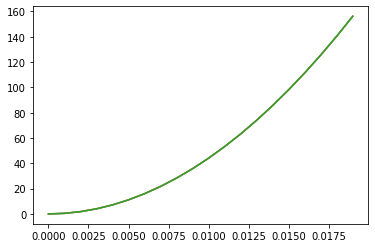

In [93]:
l0=np.array([-0.990099,-0.249,-0.107])

for e in l0:
    rho, R = sol(0, e, 0.001, 20)
    R= (rho**2)*(R**2)
    R=R/np.trapz(R,rho)
    plt.plot(rho,R)

[1.e-09 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00] [1. 0. 0. ... 0. 0. 0.] [-1.  0.  0. ...  0.  0.  0.]
[1.e-09 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00] [1. 0. 0. ... 0. 0. 0.] [-1.  0.  0. ...  0.  0.  0.]
[1.e-09 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00] [1. 0. 0. ... 0. 0. 0.] [-1.  0.  0. ...  0.  0.  0.]
[1.e-09 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00] [0. 0. 0. ... 0. 0. 0.] [1. 0. 0. ... 0. 0. 0.]
[1.e-09 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00] [0. 0. 0. ... 0. 0. 0.] [1. 0. 0. ... 0. 0. 0.]
[1.e-09 0.e+00 0.e+00 ... 0.e+00 0.e+00 0.e+00] [0. 0. 0. ... 0. 0. 0.] [1. 0. 0. ... 0. 0. 0.]


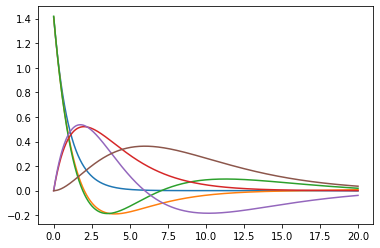

In [85]:
e = [-0.990099,-0.249,-0.107,-0.2502, -0.1101,-0.111]
for i in range(0,len(e)):
    if i < 3:
        x,y = sol(0,e[i],drho,N)
        x,y = np.array(x),np.array(y)
        y = y/np.sqrt(np.trapz(y**2,x)) 
        plt.plot(x,y)
    if i >= 3 and i < 5:
        x,y = sol(1,e[i],drho,N)
        x,y = np.array(x),np.array(y)
        y = y/np.sqrt(np.trapz(y**2,x)) 
        plt.plot(x,y)
    if i==5:
        x,y = sol(2,e[i],drho,N)
        x,y = np.array(x),np.array(y)
        y = y/np.sqrt(np.trapz(y**2,x)) 
        plt.plot(x,y)